98304/93578 [===============================] - 0s 0us/step


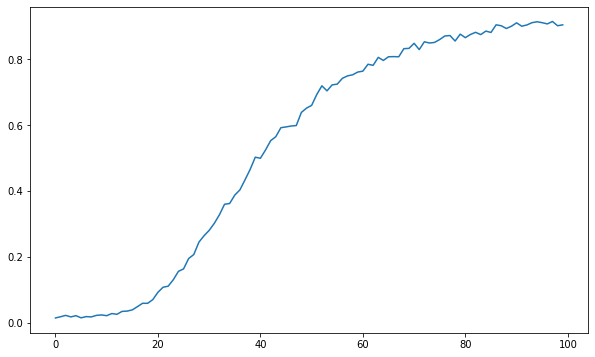

Help me Obi Wan Kenobi, you're my only hope lies thee thee thee thee more more more see thee thee thee thee thee thee thee thee thee ' '


In [1]:
#Import required library
import tensorflow as tf
import pathlib
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import io
import matplotlib.pyplot as plt

#Get training File
dataset_url = 'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt'
data_dir = tf.keras.utils.get_file('sonnets.txt', origin=dataset_url)
data_dir = pathlib.Path(data_dir)

#Read file
corpus = []
with open(data_dir, 'r') as file:
    i = 0
    for line in file:
        line = line.replace('\n', '')
        corpus.append(line)
tokenizer = Tokenizer(oov_token='<oov>')
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)

#Define sentences and labels
sequences_x = []
labels = []
for seq in sequences:
    if len(seq) != 0:
        sequences_x.append(seq[0:-1])
        labels.append(seq[-1:])
#Define Max length
max_len = 0
for line in sequences_x:
    length = len(line)
    if length > max_len:
        max_len = length

#Define Training Parameter
vocab_size = len(tokenizer.word_index.keys())
embedding_dim = 100
truncating = 'pre'
padding = 'pre'
#Pad the sequence
padded_sequences = pad_sequences(sequences_x, truncating=truncating, padding=padding, maxlen=max_len)
padded_sequences = np.array(padded_sequences)
#Preprocess labels
labels_y = tf.keras.utils.to_categorical(labels, vocab_size-1)

#Define Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size+1, output_dim=embedding_dim, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(vocab_size-1, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(padded_sequences, labels_y, epochs=100, verbose=0)
#Plot accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'])
plt.show()

#Get next words
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 20
word_dict = dict((value, key) for (key, value) in tokenizer.word_index.items())
for i in range(next_words):
    seed_sentence = [seed_text]
    seed_sequence = tokenizer.texts_to_sequences(seed_sentence)
    if len(seed_sequence[0]) > max_len:
        seed_sequence = [list(seed_sequence[0][(len(seed_sequence[0])-max_len):])]
    padded_seed_sequence = pad_sequences(seed_sequence, truncating=truncating, padding=padding, maxlen=max_len)
    seed_text = seed_text + " " + word_dict[np.argmax(model.predict(padded_seed_sequence)[0])]
print(seed_text)
